In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.inception_v3 import preprocess_input
import pandas as pd
from imutils import paths
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip '/content/gdrive/MyDrive/Grayscale Train.zip'
!unzip '/content/gdrive/MyDrive/Grayscale Test.zip'

Archive:  /content/gdrive/MyDrive/Grayscale Train.zip
   creating: Grayscale Train/Normal/
  inflating: Grayscale Train/Normal/anastase-maragos-iUzgePOoGko-unsplash.jpg  
  inflating: Grayscale Train/Normal/download (1).jpg  
  inflating: Grayscale Train/Normal/download (10).jpg  
  inflating: Grayscale Train/Normal/download (11).jpg  
  inflating: Grayscale Train/Normal/download (12).jpg  
  inflating: Grayscale Train/Normal/download (13).jpg  
  inflating: Grayscale Train/Normal/download (14).jpg  
  inflating: Grayscale Train/Normal/download (15).jpg  
  inflating: Grayscale Train/Normal/download (16).jpg  
  inflating: Grayscale Train/Normal/download (17).jpg  
  inflating: Grayscale Train/Normal/download (2).jpg  
  inflating: Grayscale Train/Normal/download (3).jpg  
  inflating: Grayscale Train/Normal/download (4).jpg  
  inflating: Grayscale Train/Normal/download (5).jpg  
  inflating: Grayscale Train/Normal/download (6).jpg  
  inflating: Grayscale Train/Normal/download (7).jp

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory("/content/Grayscale Train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory("/content/Grayscale Test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1799 images belonging to 4 classes.
Found 161 images belonging to 4 classes.


In [16]:
print(training_set)

In [17]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image

IMAGE_SIZE = [224, 224]

xcep = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False,classes=4, classifier_activation="softmax")

In [18]:
for layer in xcep.layers:
    layer.trainable = False
x = Flatten()(xcep.output)
prediction = Dense(4, activation='softmax')(x)
model = Model(inputs=xcep.input, outputs=prediction)
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  batch_size = 25
)

Epoch 1/10
57/57 [==============================] - 352s 6s/step - loss: 4.0222 - accuracy: 0.5837 - val_loss: 1.7056 - val_accuracy: 0.7453
Epoch 2/10
57/57 [==============================] - 345s 6s/step - loss: 1.8260 - accuracy: 0.7182 - val_loss: 1.9332 - val_accuracy: 0.7143
Epoch 3/10
57/57 [==============================] - 345s 6s/step - loss: 1.1652 - accuracy: 0.7971 - val_loss: 1.5774 - val_accuracy: 0.7950
Epoch 4/10
57/57 [==============================] - 343s 6s/step - loss: 1.1574 - accuracy: 0.7999 - val_loss: 1.4350 - val_accuracy: 0.8137
Epoch 5/10
57/57 [==============================] - 344s 6s/step - loss: 1.0130 - accuracy: 0.8227 - val_loss: 1.4051 - val_accuracy: 0.7702
Epoch 6/10
57/57 [==============================] - 343s 6s/step - loss: 0.7850 - accuracy: 0.8594 - val_loss: 1.5112 - val_accuracy: 0.7702
Epoch 7/10
52/57 [==========================>...] - ETA: 27s - loss: 0.7062 - accuracy: 0.8646

In [ ]:
model.save('xception.h5')

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras_preprocessing import image

image_path = "/content/most-obese-man_650x400_81490762542.jpg"

img = cv2.imread(os.path.join(image_path,image))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

img = image.load_img( image_path , color_mode = "grayscale", target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img.shape

(1, 224, 224, 3)

In [ ]:
predict = model.predict([img])

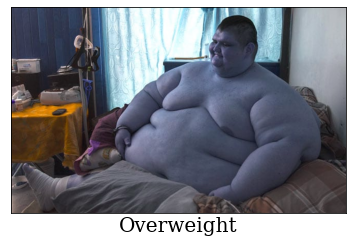

In [ ]:
img1 = cv2.imread("/content/most-obese-man_650x400_81490762542.jpg")
plt.imshow(img1)

plt.xticks([])
plt.yticks([])



font = {'family': 'serif',
        'color':  'BLACK',
        'weight': 'medium',
        'size': 20,
        }



if predict[0][0] == 1 :
    plt.xlabel("Underweight" , fontdict = font)

if predict[0][1] == 1 :
    plt.xlabel("Normal" , fontdict = font)
    
if predict[0][2] == 1 :
    plt.xlabel("Overweight" , fontdict = font)

if predict[0][3] == 1 :
    plt.xlabel("Obese" , fontdict = font)


plt.show()

In [ ]:
predict

array([[0., 0., 1., 0.]], dtype=float32)